dataset : https://www.kaggle.com/datasets/ardikasatria/datasettanamanpadisumatera

model ini dibuat untuk mendapatkan estimasi hasil produksi/panen padi di sumatera dalam satuan ton dengan inputan :

Luas tanah pertanian (Hektar)

Jumlah rata-rata curah hujan dalam setahun (milimeter)

Tingkat kelembaban rata-rata dalam setahun (persentase)

Derajat suhu rata-rata dalam setahun (celsius)


diharapkan model ini akan membantu petani padi sumatera untuk mengetahui estimasi hasil panen padi.

Total data adalah 224 yang mana untuk setiap provinsi memiliki 28 data tahunan.

Dataset terdiri dari atribut berikut:

Provinsi: Nama provinsi

Tahun : Tahun produksi padi

Produksi: Hasil produksi atau panen tahunan (ton)

Luas Panen: Luas Pertanian (hektar)

Curah hujan: Jumlah rata-rata curah hujan dalam setahun (milimeter)

Kelembaban: Tingkat kelembaban rata-rata dalam setahun (persentase)

Suhu Rata-Rata: Derajat suhu rata-rata dalam setahun (celsius)

Atribut nomor 1 - 4 dikumpulkan dari Database Badan Pusat Statistik Indonesia, dan atribut lainnya dikumpulkan dari Database Badan Meteorologi, Klimatologi, dan Geofisika Indonesia

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alanhermawan","key":"2cb8bd98be2732332a972020374fa050"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d ardikasatria/datasettanamanpadisumatera

  0% 0.00/4.75k [00:00<?, ?B/s]
100% 4.75k/4.75k [00:00<00:00, 2.21MB/s]


In [4]:
!mkdir datasettanamanpadisumatera
!unzip datasettanamanpadisumatera.zip -d datasettanamanpadisumatera
!ls datasettanamanpadisumatera

Archive:  datasettanamanpadisumatera.zip
  inflating: datasettanamanpadisumatera/Data_Tanaman_Padi_Sumatera_version_1.csv  
Data_Tanaman_Padi_Sumatera_version_1.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/content/datasettanamanpadisumatera/Data_Tanaman_Padi_Sumatera_version_1.csv')

In [7]:
df.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Tahun,224.0,2.006500e+03,8.095838e+00,1993.00,1999.7500,2006.500,2013.25,2020.00
Produksi,224.0,1.679701e+06,1.161387e+06,42938.00,548857.0000,1667773.000,2436850.75,4881089.00
Luas Panen,224.0,3.743500e+05,2.327512e+05,63142.04,146919.5000,373551.500,514570.25,872737.00
Curah hujan,224.0,2.452491e+03,1.031973e+03,222.50,1703.5250,2315.700,3039.70,5522.00
Kelembapan,224.0,8.094871e+01,4.878680e+00,54.20,78.9750,82.375,84.00,90.60
Suhu rata-rata,224.0,2.680196e+01,1.197041e+00,22.19,26.1775,26.730,27.20,29.85


<Axes: >

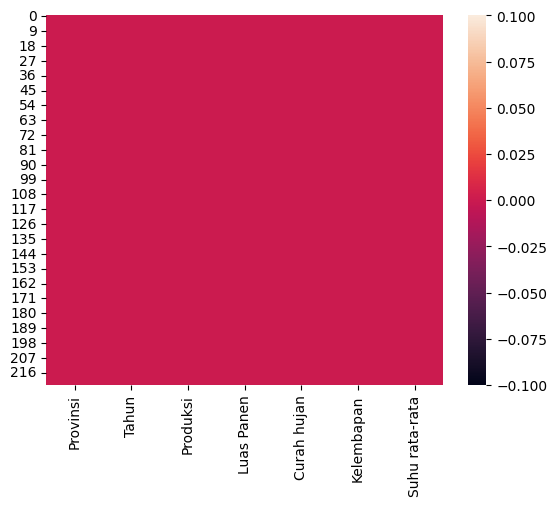

In [10]:
sns.heatmap(df.isnull())

<Axes: >

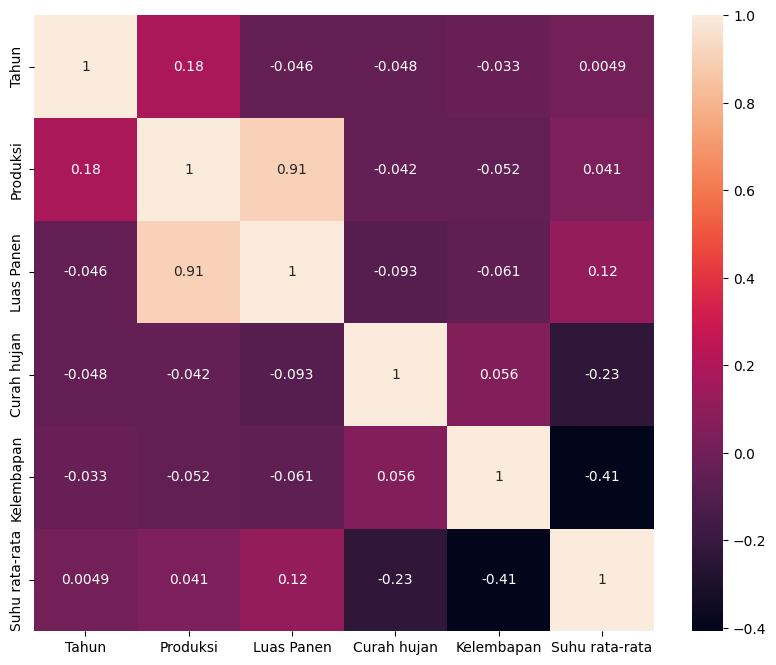

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)

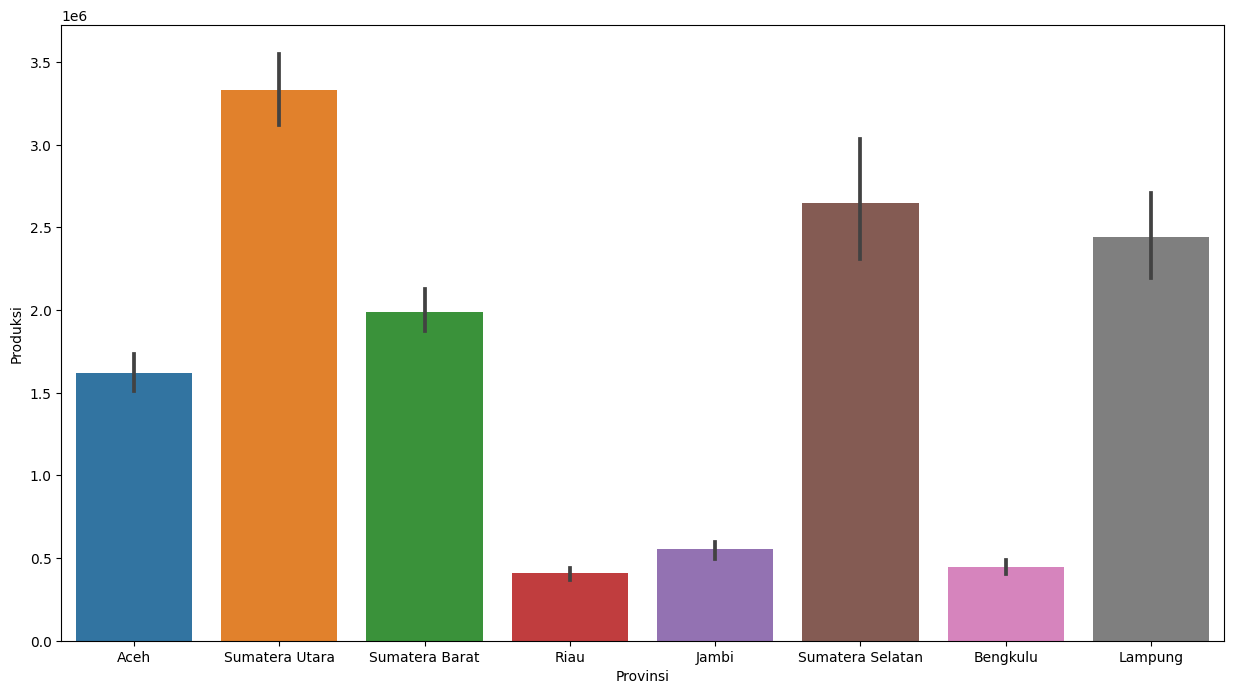

In [12]:
plt.figure(figsize=(15,8))
sns.barplot(x='Provinsi', y='Produksi', data=df)
plt.show()

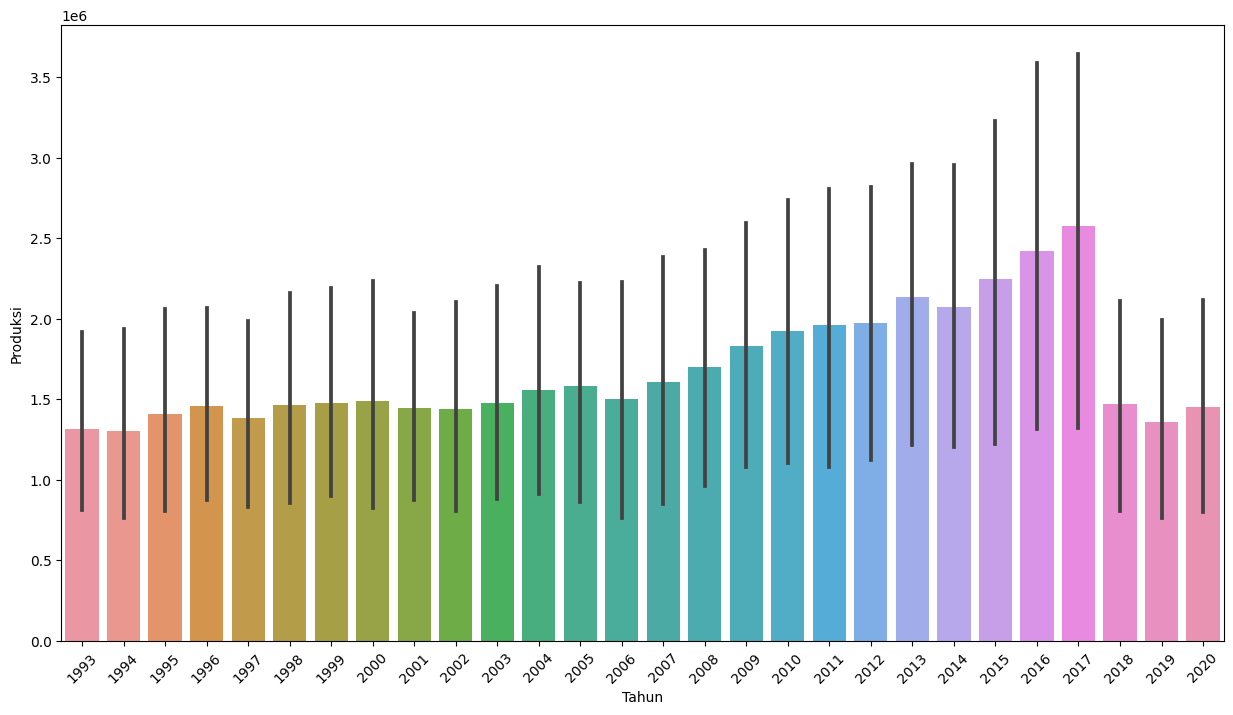

In [13]:
plt.figure(figsize=(15,8))
sns.barplot(x='Tahun',y='Produksi',data=df)
plt.xticks(rotation=45)
plt.show()

In [14]:
df = df.drop(['Provinsi','Tahun'], axis=1)

In [15]:
df.columns

Index(['Produksi', 'Luas Panen', 'Curah hujan', 'Kelembapan',
       'Suhu rata-rata'],
      dtype='object')

In [18]:
features = ['Luas Panen', 'Curah hujan','Kelembapan', 'Suhu rata-rata']
x = df[features]
y = df['Produksi']
x.shape, y.shape

((224, 4), (224,))

In [19]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(56,)

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [21]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score*100,"%")

akurasi model regresi linier =  86.63623649914514 %


In [24]:
input_data = np.array([[348223.0, 1557.0, 83.00, 26.08]])
prediction = lr.predict(input_data)
print('Estimasi Hasil Panen Padi :', prediction)

Estimasi Hasil Panen Padi : [1545085.92141251]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [25]:
import pickle

filename = 'estimasi-hasil-panen-padi.sav'
pickle.dump(lr,open(filename,'wb'))